In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from collections import defaultdict
from collections import Counter

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
artists_df = pickle.load( open( r"C:\Users\abels\Desktop\spotify_scrape\Data\final_csv_files\artists_master.p", "rb" ) )
song_df = pickle.load( open( r"C:\Users\abels\Desktop\spotify_scrape\Data\final_csv_files\song_dataframe_master.p", "rb" ) )
song_feature_df = pickle.load( open( r"C:\Users\abels\Desktop\spotify_scrape\Data\final_csv_files\song_feature_masterdf.p", "rb" ) )

In [4]:
artists_df.head()

,Artist,api_url,artist_api_id,genres
0,Dido,https://open.spotify.com/artist/2mpeljBig2IXLX...,2mpeljBig2IXLXRAFO9AAs,"[dance pop, new wave pop, pop, pop rock]"
1,James TW,https://open.spotify.com/artist/0B3N0ZINFWvizf...,0B3N0ZINFWvizfa8bKiz4v,"[australian pop, dance pop, indie cafe pop, ne..."
2,Justin Stone,https://open.spotify.com/artist/5Vu87j6vCvfwc7...,5Vu87j6vCvfwc7FNVGnBwk,"[deep underground hip hop, indie pop rap]"
3,Natasha Bedingfield,https://open.spotify.com/artist/7o95ZoZt5ZYn31...,7o95ZoZt5ZYn31e9z1Hc0a,"[dance pop, europop, folk-pop, neo mellow, pop..."
4,GAMMAL,https://open.spotify.com/artist/3O6DpqAKwn7L1K...,3O6DpqAKwn7L1KS9s9x0w5,"[indie cafe pop, swedish pop]"


In [5]:
artists_df.shape

(4665, 4)

In [6]:
song_df = pd.DataFrame.from_dict(song_df, orient='index')

In [7]:
song_df.head()

,artist_id,name,explicit,popularity,track_id,Artist_name
000TiSS4vK5su0MkoFyQbd,1YzDKK9gJRBqqkL5wxQQTa,Tenebre,False,53,000TiSS4vK5su0MkoFyQbd,Sercho
000xYdQfIZ4pDmBGzQalKU,3qvcCP2J0fWi0m0uQDUf6r,"Eu, Você, O Mar e Ela",False,52,000xYdQfIZ4pDmBGzQalKU,Luan Santana
002DUjoJzO3NqA4w3mTA2i,1FyYqlTR8CuFH7eRGd0tpe,5gether,False,18,002DUjoJzO3NqA4w3mTA2i,2gether
002r1ZwqA9IL2pWtJMOs9f,07d5etnpjriczFBB8pxmRe,Worryin' Bout Me,True,49,002r1ZwqA9IL2pWtJMOs9f,BJ The Chicago Kid
003F0rm5lqxcmhvJPKgfaJ,3MRynBsyLGzv3IQ9Fip6hO,El Remedio,False,43,003F0rm5lqxcmhvJPKgfaJ,Ana Guerra


In [8]:
song_df = song_df.reset_index()

In [9]:
song_df.columns.values[0] = 'track_id2'

In [10]:
song_df.head()

,track_id2,artist_id,name,explicit,popularity,track_id,Artist_name
0,000TiSS4vK5su0MkoFyQbd,1YzDKK9gJRBqqkL5wxQQTa,Tenebre,False,53,000TiSS4vK5su0MkoFyQbd,Sercho
1,000xYdQfIZ4pDmBGzQalKU,3qvcCP2J0fWi0m0uQDUf6r,"Eu, Você, O Mar e Ela",False,52,000xYdQfIZ4pDmBGzQalKU,Luan Santana
2,002DUjoJzO3NqA4w3mTA2i,1FyYqlTR8CuFH7eRGd0tpe,5gether,False,18,002DUjoJzO3NqA4w3mTA2i,2gether
3,002r1ZwqA9IL2pWtJMOs9f,07d5etnpjriczFBB8pxmRe,Worryin' Bout Me,True,49,002r1ZwqA9IL2pWtJMOs9f,BJ The Chicago Kid
4,003F0rm5lqxcmhvJPKgfaJ,3MRynBsyLGzv3IQ9Fip6hO,El Remedio,False,43,003F0rm5lqxcmhvJPKgfaJ,Ana Guerra


In [11]:
song_feature_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,000TiSS4vK5su0MkoFyQbd,0.717,0.646,6,-7.692,0,0.1070,0.237,0.000000,0.1270,0.0966,80.022,audio_features,000TiSS4vK5su0MkoFyQbd,spotify:track:000TiSS4vK5su0MkoFyQbd,https://api.spotify.com/v1/tracks/000TiSS4vK5s...,https://api.spotify.com/v1/audio-analysis/000T...,159250,4
1,000xYdQfIZ4pDmBGzQalKU,0.509,0.803,0,-6.743,1,0.0400,0.684,0.000539,0.4630,0.6510,166.018,audio_features,000xYdQfIZ4pDmBGzQalKU,spotify:track:000xYdQfIZ4pDmBGzQalKU,https://api.spotify.com/v1/tracks/000xYdQfIZ4p...,https://api.spotify.com/v1/audio-analysis/000x...,187119,4
2,002DUjoJzO3NqA4w3mTA2i,0.783,0.880,2,-4.927,1,0.2370,0.256,0.000000,0.1050,0.5400,113.932,audio_features,002DUjoJzO3NqA4w3mTA2i,spotify:track:002DUjoJzO3NqA4w3mTA2i,https://api.spotify.com/v1/tracks/002DUjoJzO3N...,https://api.spotify.com/v1/audio-analysis/002D...,251267,4
3,002r1ZwqA9IL2pWtJMOs9f,0.668,0.778,10,-4.912,0,0.0991,0.352,0.000000,0.5610,0.5310,126.919,audio_features,002r1ZwqA9IL2pWtJMOs9f,spotify:track:002r1ZwqA9IL2pWtJMOs9f,https://api.spotify.com/v1/tracks/002r1ZwqA9IL...,https://api.spotify.com/v1/audio-analysis/002r...,235751,4
4,003F0rm5lqxcmhvJPKgfaJ,0.683,0.676,1,-6.688,0,0.1470,0.159,0.000000,0.0726,0.4340,98.992,audio_features,003F0rm5lqxcmhvJPKgfaJ,spotify:track:003F0rm5lqxcmhvJPKgfaJ,https://api.spotify.com/v1/tracks/003F0rm5lqxc...,https://api.spotify.com/v1/audio-analysis/003F...,180933,4


In [12]:
song_feature_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,44135.000000,4.413500e+04,44135.000000
mean,0.632571,0.649914,5.306967,-7.263420,0.611737,0.103013,0.257879,0.050597,0.189085,0.518110,120.371369,2.180257e+05,3.957245
std,0.155702,0.205306,3.598138,3.511253,0.487361,0.104982,0.277702,0.175376,0.157644,0.238962,28.188996,6.175961e+04,0.309599
min,0.000000,0.000279,0.000000,-38.723000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,5.547000e+03,0.000000
25%,0.533000,0.522000,2.000000,-8.783000,0.000000,0.037100,0.032200,0.000000,0.094300,0.331000,98.002000,1.832215e+05,4.000000
50%,0.646000,0.679000,6.000000,-6.499000,1.000000,0.055300,0.146000,0.000003,0.125000,0.517000,120.010000,2.100350e+05,4.000000
75%,0.746000,0.810000,8.000000,-4.926000,1.000000,0.122000,0.409000,0.000631,0.235000,0.707000,137.957500,2.419645e+05,4.000000
max,0.990000,0.999000,11.000000,1.498000,1.000000,0.963000,0.995000,0.999000,0.997000,0.992000,244.613000,3.720547e+06,5.000000


In [13]:
genres_list = artists_df['genres']
genres_list.head()

0             [dance pop, new wave pop, pop, pop rock]
1    [australian pop, dance pop, indie cafe pop, ne...
2            [deep underground hip hop, indie pop rap]
3    [dance pop, europop, folk-pop, neo mellow, pop...
4                        [indie cafe pop, swedish pop]
Name: genres, dtype: object

In [14]:
unique_genres = list(set(list(chain(*genres_list))))

In [15]:
len(unique_genres)
genre_count = defaultdict(int)

In [16]:
for x in artists_df['genres']:
    for y in x:
        genre_count[y] += 1

genre_count = Counter(genre_count)

In [17]:
genre_count.most_common(10)

[('pop', 599),
 ('dance pop', 463),
 ('pop rap', 322),
 ('rock', 319),
 ('rap', 314),
 ('tropical house', 264),
 ('hip hop', 258),
 ('modern rock', 257),
 ('post-teen pop', 253),
 ('edm', 241)]

In [18]:
len(genre_count)

1023

In [19]:
common_genres = genre_count.most_common(10)

In [20]:
common_genres

[('pop', 599),
 ('dance pop', 463),
 ('pop rap', 322),
 ('rock', 319),
 ('rap', 314),
 ('tropical house', 264),
 ('hip hop', 258),
 ('modern rock', 257),
 ('post-teen pop', 253),
 ('edm', 241)]

In [21]:
common_genres = dict((y,x) for y,x in common_genres)

In [22]:
genre_count.most_common(100)

[('pop', 599),
 ('dance pop', 463),
 ('pop rap', 322),
 ('rock', 319),
 ('rap', 314),
 ('tropical house', 264),
 ('hip hop', 258),
 ('modern rock', 257),
 ('post-teen pop', 253),
 ('edm', 241),
 ('r&b', 231),
 ('trap music', 218),
 ('electropop', 214),
 ('latin', 214),
 ('southern hip hop', 210),
 ('mellow gold', 193),
 ('adult standards', 191),
 ('soft rock', 184),
 ('indie poptimism', 175),
 ('pop rock', 172),
 ('electro house', 169),
 ('underground hip hop', 162),
 ('indietronica', 161),
 ('tropical', 156),
 ('indie rock', 151),
 ('folk-pop', 150),
 ('indie pop', 139),
 ('europop', 136),
 ('classic rock', 136),
 ('album rock', 135),
 ('urban contemporary', 135),
 ('neo mellow', 131),
 ('brill building pop', 127),
 ('pop edm', 126),
 ('new wave pop', 125),
 ('latin pop', 124),
 ('folk rock', 120),
 ('indie folk', 119),
 ('lounge', 114),
 ('indie r&b', 112),
 ('new rave', 110),
 ('gangster rap', 108),
 ('big room', 107),
 ('post-grunge', 106),
 ('funk carioca', 105),
 ('dance rock', 1

In [23]:
common_genres

{'pop': 599,
 'dance pop': 463,
 'pop rap': 322,
 'rock': 319,
 'rap': 314,
 'tropical house': 264,
 'hip hop': 258,
 'modern rock': 257,
 'post-teen pop': 253,
 'edm': 241}

In [24]:
master_df = song_df.merge(artists_df, how='outer', left_on='artist_id', right_on='artist_api_id')

In [25]:
master_df = master_df.merge(song_feature_df, how='inner', left_on='track_id', right_on='track_id', suffixes=('track_id', 'track_id2'))

In [26]:
master_df.columns

Index(['track_id2', 'artist_id', 'name', 'explicit', 'popularity', 'track_id',
       'Artist_name', 'Artist', 'api_url', 'artist_api_id', 'genres',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [27]:
master_df = master_df.drop(columns=['track_id2', 'Artist_name', 'artist_id', 'artist_api_id', 'type', 'id', 'uri', 'track_href', 'analysis_url'])
master_df.head()

,name,explicit,popularity,track_id,Artist,api_url,genres,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Tenebre,False,53.0,000TiSS4vK5su0MkoFyQbd,Sercho,https://open.spotify.com/artist/1YzDKK9gJRBqqk...,[italian hip hop],0.717,0.646,6,-7.692,0,0.1070,0.2370,0.0,0.1270,0.0966,80.022,159250,4
1,E si e vai,False,29.0,2ZTrecIfmBbbuWkB4LjNn1,Sercho,https://open.spotify.com/artist/1YzDKK9gJRBqqk...,[italian hip hop],0.840,0.601,0,-6.701,0,0.0412,0.0467,0.0,0.3300,0.1550,130.041,182565,4
2,Honiro monster track,True,33.0,2klXG5NsPdTz6YPXTe9cTI,Sercho,https://open.spotify.com/artist/1YzDKK9gJRBqqk...,[italian hip hop],0.714,0.507,1,-9.360,1,0.3240,0.0212,0.0,0.3260,0.4950,92.740,150500,4
3,Le solite canzoni,True,41.0,2l4qXCzxgzD8A8oAEXGnXQ,Sercho,https://open.spotify.com/artist/1YzDKK9gJRBqqk...,[italian hip hop],0.679,0.413,6,-9.889,0,0.0379,0.5600,0.0,0.0946,0.3890,122.546,242363,4
4,Sbaglierò di nuovo,False,29.0,3Cgs2ohEo4wmen2YXFT2lC,Sercho,https://open.spotify.com/artist/1YzDKK9gJRBqqk...,[italian hip hop],0.684,0.616,2,-6.809,1,0.0444,0.0735,0.0,0.1030,0.3450,128.008,190578,4


In [28]:
master_df['pop'] = 0
master_df['dance pop'] = 0
master_df['pop rap'] = 0
master_df['rock'] = 0
master_df['tropical house'] = 0
master_df['hip hop'] = 0
master_df['modern rock'] = 0
master_df['post-teen pop'] = 0
master_df['edm'] = 0
master_df['rap'] = 0

In [29]:
master_df['pop'] = master_df['pop'].astype(int)
master_df['dance pop'] = master_df['dance pop'].astype(int)
master_df['pop rap'] = master_df['pop rap'].astype(int)
master_df['rock'] = master_df['rock'].astype(int)
master_df['tropical house'] = master_df['tropical house'].astype(int)
master_df['hip hop'] = master_df['hip hop'].astype(int)
master_df['modern rock'] = master_df['modern rock'].astype(int)
master_df['post-teen pop'] = master_df['post-teen pop'].astype(int)
master_df['edm'] = master_df['edm'].astype(int)
master_df['rap'] = master_df['rap'].astype(int)

In [30]:
for i, j in master_df['genres'].iteritems(): 
    for x in common_genres.keys():
        if x in j:
            master_df.at[i,x] = 1

In [31]:
mask = master_df['pop'] + master_df['dance pop'] + master_df['pop rap'] + master_df['rock'] + master_df['tropical house'] + master_df['hip hop'] + master_df['modern rock'] + master_df['post-teen pop'] + master_df['edm']

In [32]:
formated_df = master_df
formated_df['target_genre'] = mask
formated_df.head()

,name,explicit,popularity,track_id,Artist,api_url,genres,danceability,energy,key,...,dance pop,pop rap,rock,tropical house,hip hop,modern rock,post-teen pop,edm,rap,target_genre
0,Tenebre,False,53.0,000TiSS4vK5su0MkoFyQbd,Sercho,https://open.spotify.com/artist/1YzDKK9gJRBqqk...,[italian hip hop],0.717,0.646,6,...,0,0,0,0,0,0,0,0,0,0
1,E si e vai,False,29.0,2ZTrecIfmBbbuWkB4LjNn1,Sercho,https://open.spotify.com/artist/1YzDKK9gJRBqqk...,[italian hip hop],0.840,0.601,0,...,0,0,0,0,0,0,0,0,0,0
2,Honiro monster track,True,33.0,2klXG5NsPdTz6YPXTe9cTI,Sercho,https://open.spotify.com/artist/1YzDKK9gJRBqqk...,[italian hip hop],0.714,0.507,1,...,0,0,0,0,0,0,0,0,0,0
3,Le solite canzoni,True,41.0,2l4qXCzxgzD8A8oAEXGnXQ,Sercho,https://open.spotify.com/artist/1YzDKK9gJRBqqk...,[italian hip hop],0.679,0.413,6,...,0,0,0,0,0,0,0,0,0,0
4,Sbaglierò di nuovo,False,29.0,3Cgs2ohEo4wmen2YXFT2lC,Sercho,https://open.spotify.com/artist/1YzDKK9gJRBqqk...,[italian hip hop],0.684,0.616,2,...,0,0,0,0,0,0,0,0,0,0


In [33]:
formated_df = formated_df[formated_df.target_genre > 0]

In [34]:
formated_df.head()

,name,explicit,popularity,track_id,Artist,api_url,genres,danceability,energy,key,...,dance pop,pop rap,rock,tropical house,hip hop,modern rock,post-teen pop,edm,rap,target_genre
30,Worryin' Bout Me,True,49.0,002r1ZwqA9IL2pWtJMOs9f,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.668,0.778,10,...,0,1,0,0,1,0,0,0,1,2
31,Close,True,52.0,11UsaZi96OOQ5nbWLht4UP,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.540,0.522,5,...,0,1,0,0,1,0,0,0,1,2
32,Time Today,False,52.0,1ENwTLdSFBmbIfmiK6o6Ue,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.524,0.536,0,...,0,1,0,0,1,0,0,0,1,2
33,Roses,True,54.0,3SwhPTNNU5hpF33bbCsji6,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.655,0.597,0,...,0,1,0,0,1,0,0,0,1,2
34,Turnin' Me Up,False,65.0,5MjAFPcmrR1DYCgZrXCN4d,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.734,0.776,2,...,0,1,0,0,1,0,0,0,1,2


In [35]:
formated_df.columns

Index(['name', 'explicit', 'popularity', 'track_id', 'Artist', 'api_url',
       'genres', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'pop', 'dance pop',
       'pop rap', 'rock', 'tropical house', 'hip hop', 'modern rock',
       'post-teen pop', 'edm', 'rap', 'target_genre'],
      dtype='object')

In [36]:
final_formatted_df = pd.melt(formated_df, id_vars=['name', 'explicit', 'popularity', 'track_id', 'Artist', 'api_url',
       'genres', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'], value_vars=['pop', 'dance pop',
       'pop rap', 'rock', 'tropical house', 'hip hop', 'modern rock',
       'post-teen pop', 'edm', 'rap'], var_name='genre')

In [37]:
final_formatted_df.head()

,name,explicit,popularity,track_id,Artist,api_url,genres,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,value
0,Worryin' Bout Me,True,49.0,002r1ZwqA9IL2pWtJMOs9f,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.668,0.778,10,...,0.0991,0.3520,0.000,0.5610,0.531,126.919,235751,4,pop,0
1,Close,True,52.0,11UsaZi96OOQ5nbWLht4UP,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.540,0.522,5,...,0.0757,0.6630,0.000,0.3360,0.318,80.928,231271,4,pop,0
2,Time Today,False,52.0,1ENwTLdSFBmbIfmiK6o6Ue,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.524,0.536,0,...,0.0570,0.1020,0.000,0.0334,0.349,92.625,199718,4,pop,0
3,Roses,True,54.0,3SwhPTNNU5hpF33bbCsji6,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.655,0.597,0,...,0.0912,0.3800,0.000,0.1100,0.219,110.010,181144,4,pop,0
4,Turnin' Me Up,False,65.0,5MjAFPcmrR1DYCgZrXCN4d,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.734,0.776,2,...,0.0826,0.0406,0.193,0.0547,0.843,78.542,269173,4,pop,0


In [38]:
final_formatted_df = final_formatted_df[final_formatted_df.value > 0]

In [39]:
final_formatted_df.shape

(30479, 22)

In [40]:
sns.set_style("dark")
plt.rcParams["axes.labelsize"] = 15

In [41]:
def pctile(data, prt=[5,95]):
    adj_data = data[(data > np.percentile(data,prt)[0]) & (data < np.percentile(data,prt)[1])]
    return adj_data

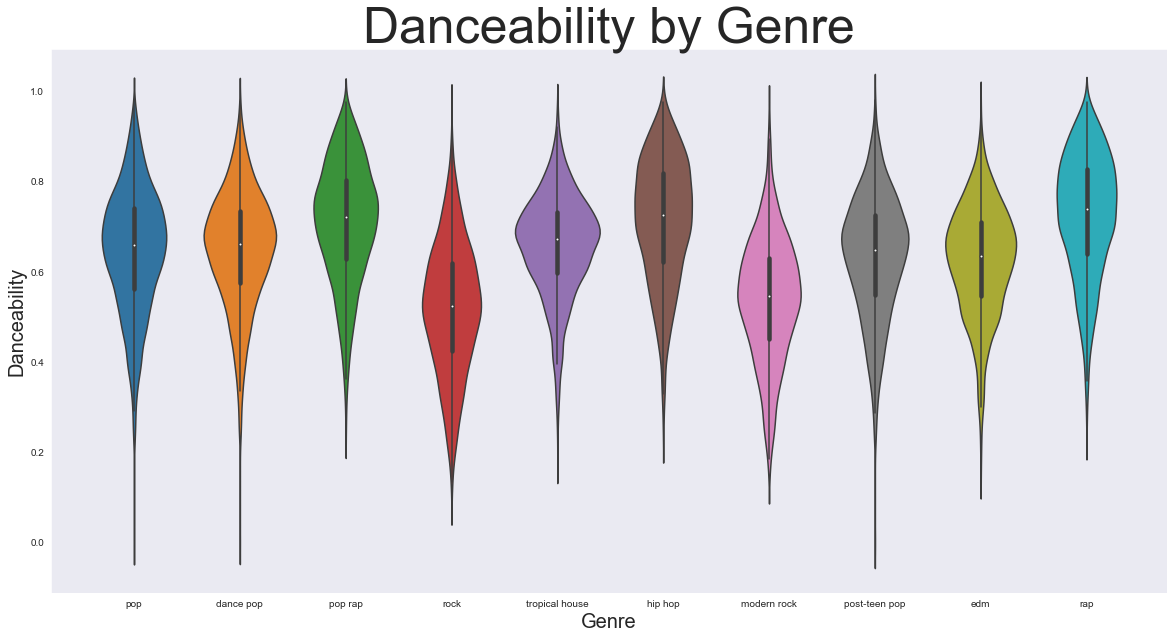

In [42]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, final_formatted_df.danceability)
_.axes.set_title("Danceability by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("Danceability",fontsize=20)

_ = plt.plot()

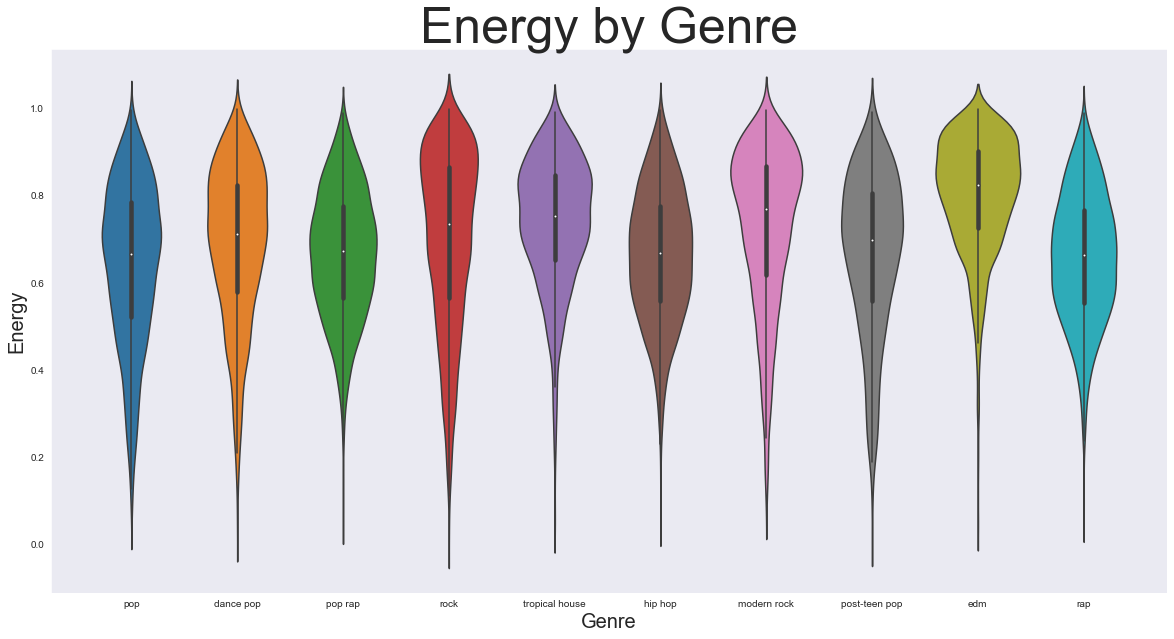

In [43]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, final_formatted_df.energy)
_.axes.set_title("Energy by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("Energy",fontsize=20)

_ = plt.plot()

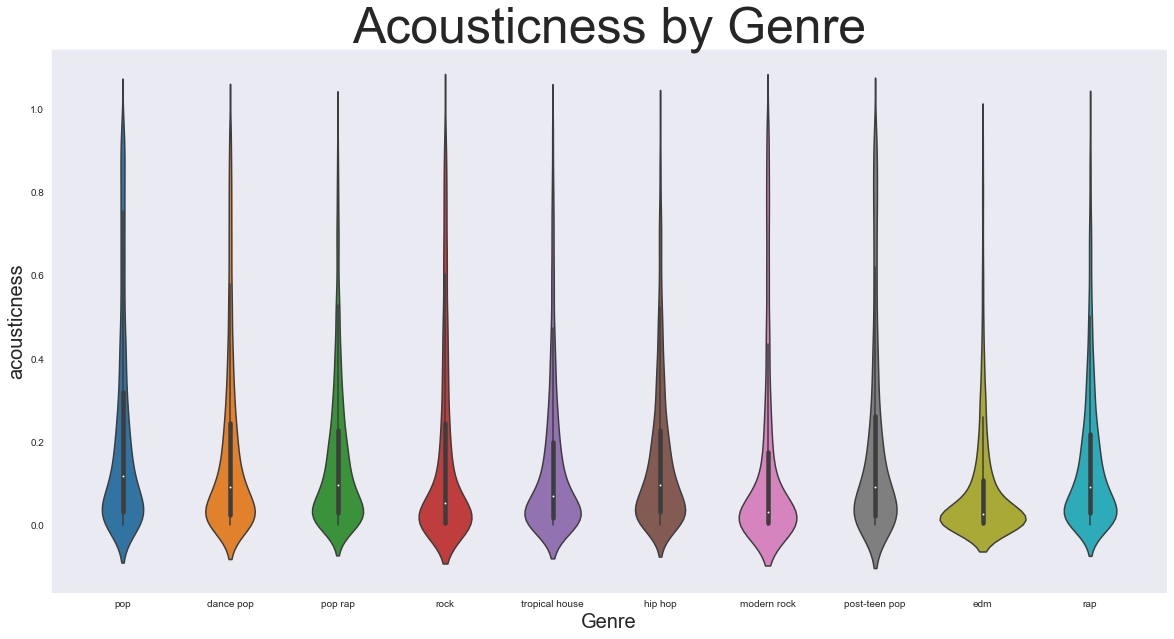

In [44]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, final_formatted_df.acousticness)
_.axes.set_title("Acousticness by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("acousticness",fontsize=20)
#pctile(data, prt=[5,95]
_ = plt.plot()

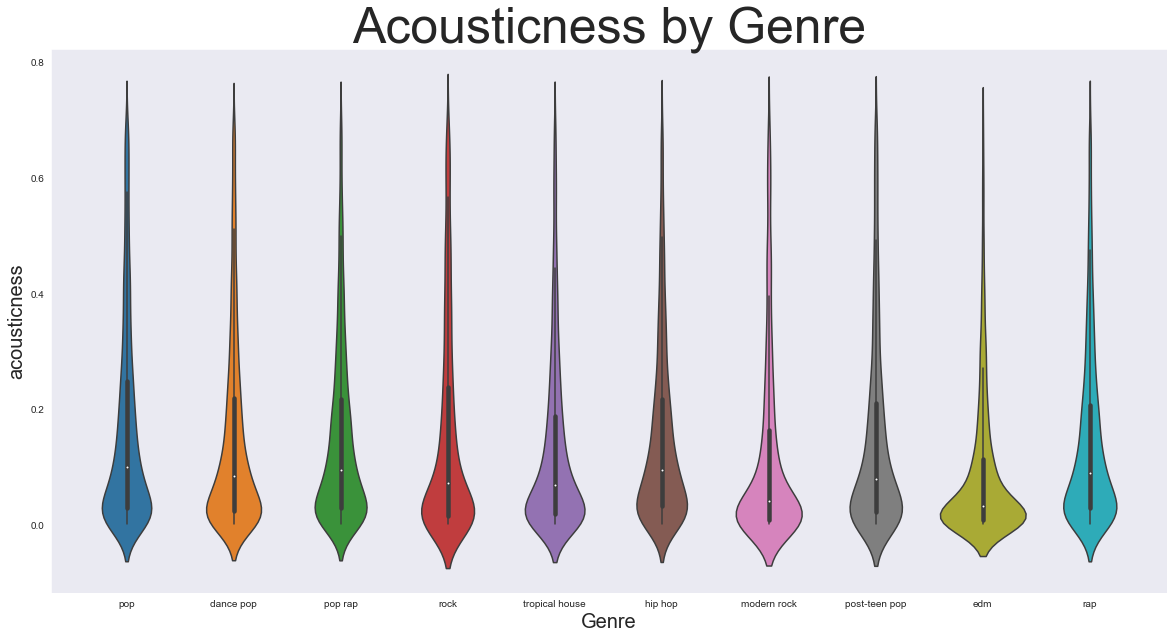

In [45]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.acousticness))
_.axes.set_title("Acousticness by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("acousticness",fontsize=20)
#pctile(data, prt=[5,95]
_ = plt.plot()

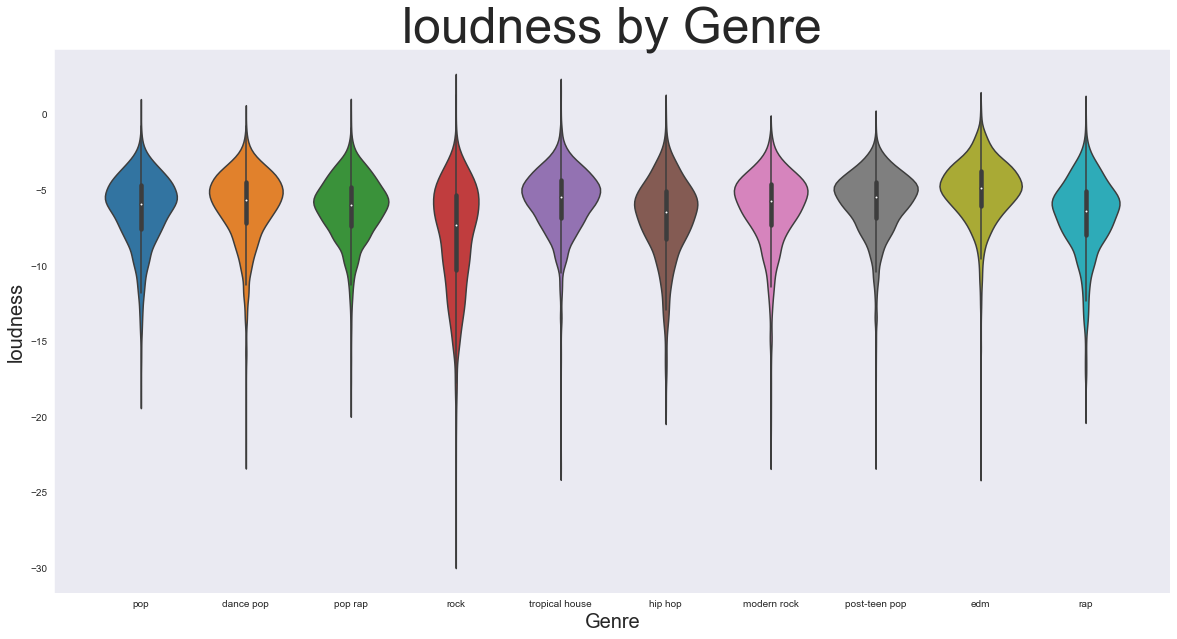

In [46]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, final_formatted_df.loudness)
_.axes.set_title("loudness by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("loudness",fontsize=20)

_ = plt.plot()

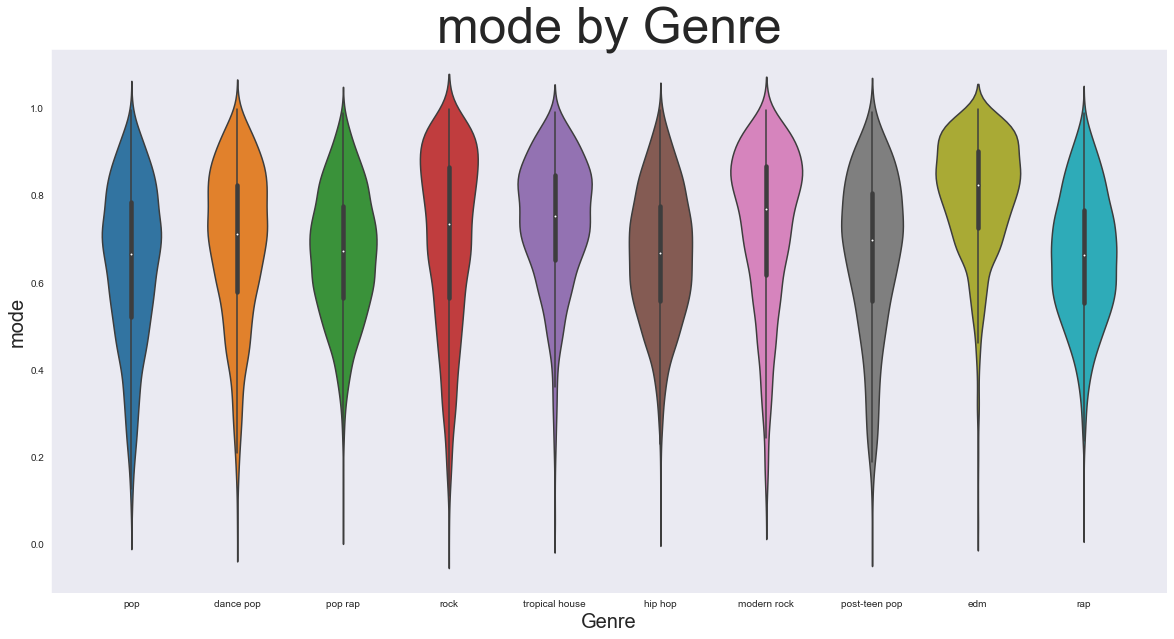

In [47]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, final_formatted_df.energy)
_.axes.set_title("mode by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("mode",fontsize=20)

_ = plt.plot()

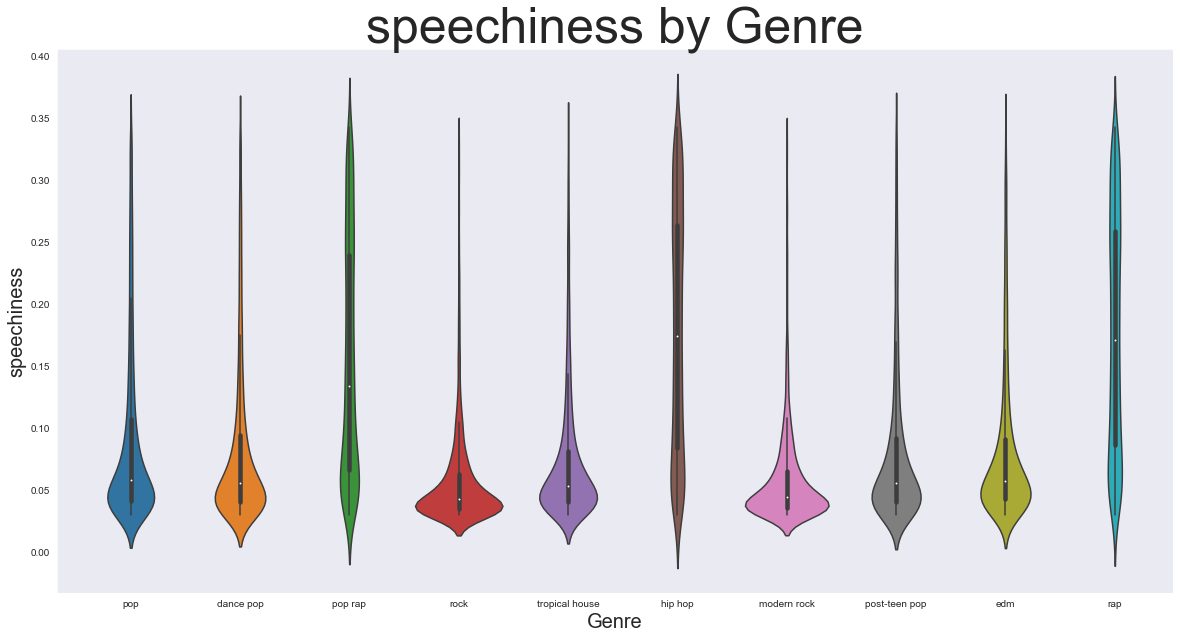

In [48]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.speechiness))
_.axes.set_title("speechiness by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("speechiness",fontsize=20)

_ = plt.plot()

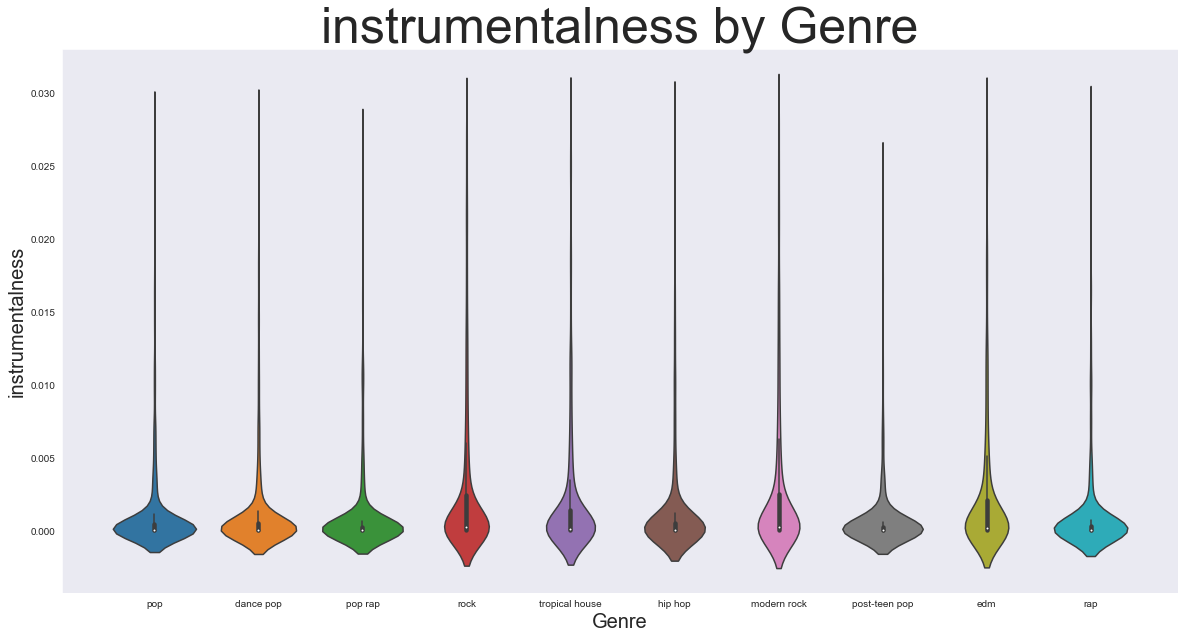

In [49]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.instrumentalness, [10,90]))
_.axes.set_title("instrumentalness by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("instrumentalness",fontsize=20)

_ = plt.plot()

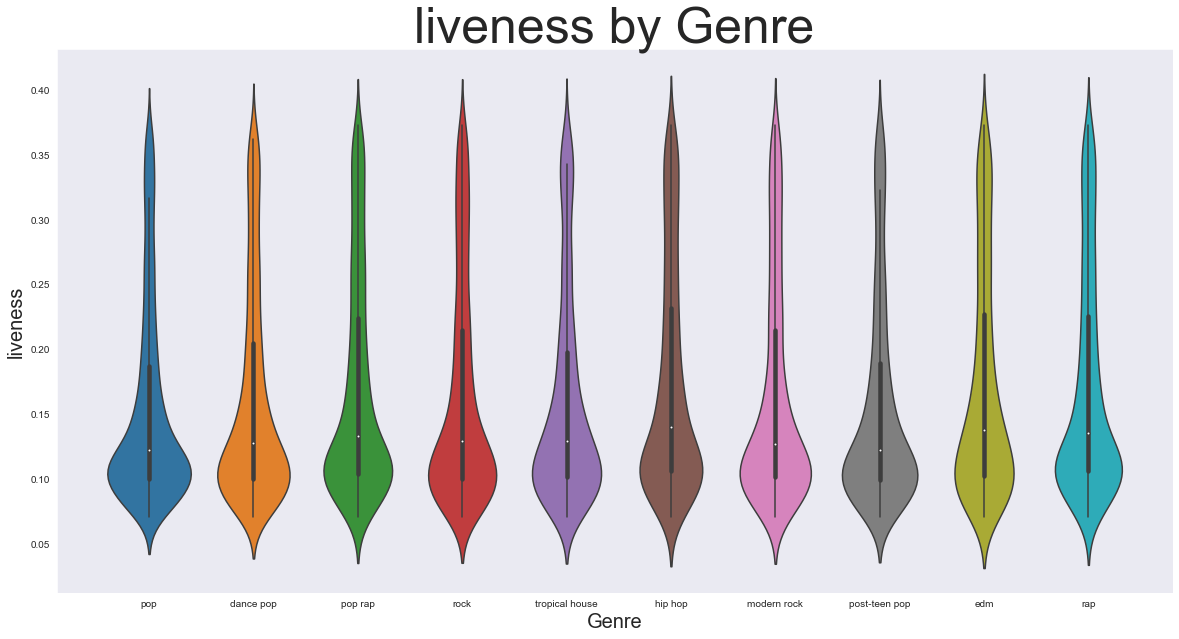

In [50]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.liveness, [10,90]))
_.axes.set_title("liveness by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("liveness",fontsize=20)

_ = plt.plot()

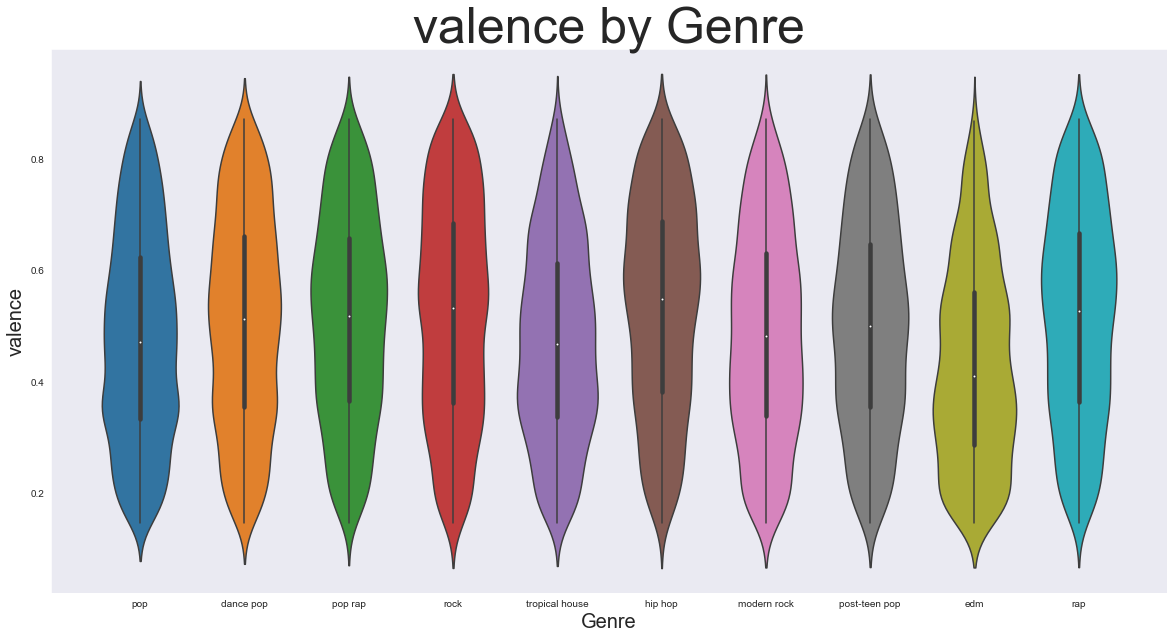

In [51]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.valence))
_.axes.set_title("valence by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("valence",fontsize=20)

_ = plt.plot()

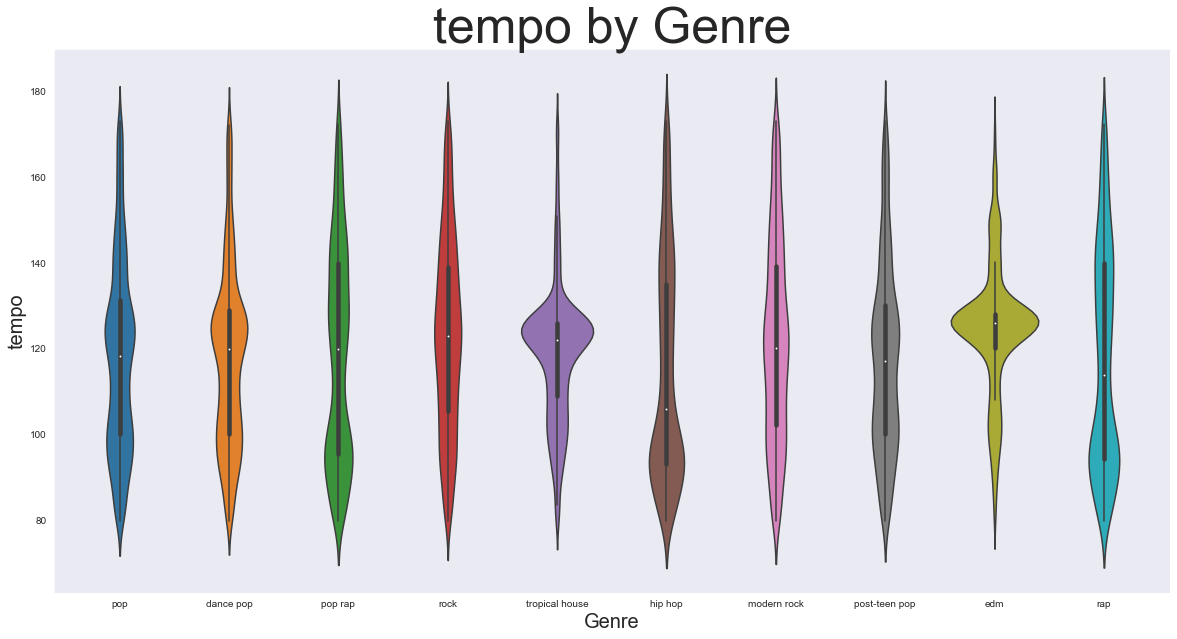

In [52]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.tempo))
_.axes.set_title("tempo by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("tempo",fontsize=20)

_ = plt.plot()

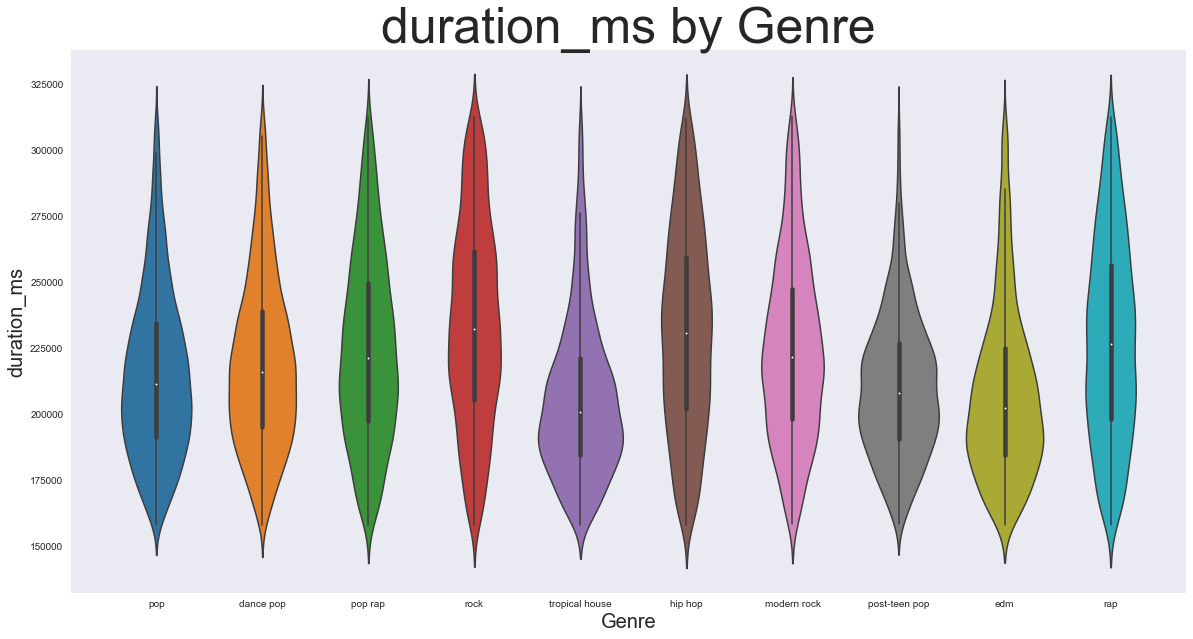

In [53]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, pctile(final_formatted_df.duration_ms))
_.axes.set_title("duration_ms by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("duration_ms",fontsize=20)

_ = plt.plot()

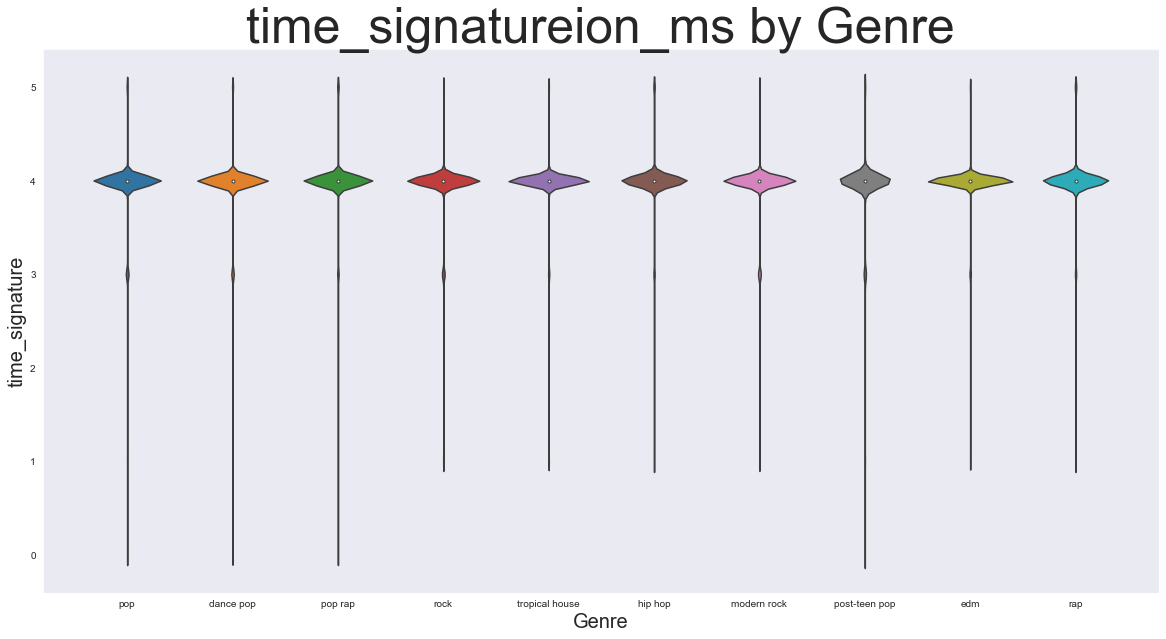

In [54]:
_ = plt.figure(figsize=(20,10))

_ = sns.violinplot(final_formatted_df.genre, final_formatted_df.time_signature)
_.axes.set_title("time_signatureion_ms by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("time_signature",fontsize=20)

_ = plt.plot()

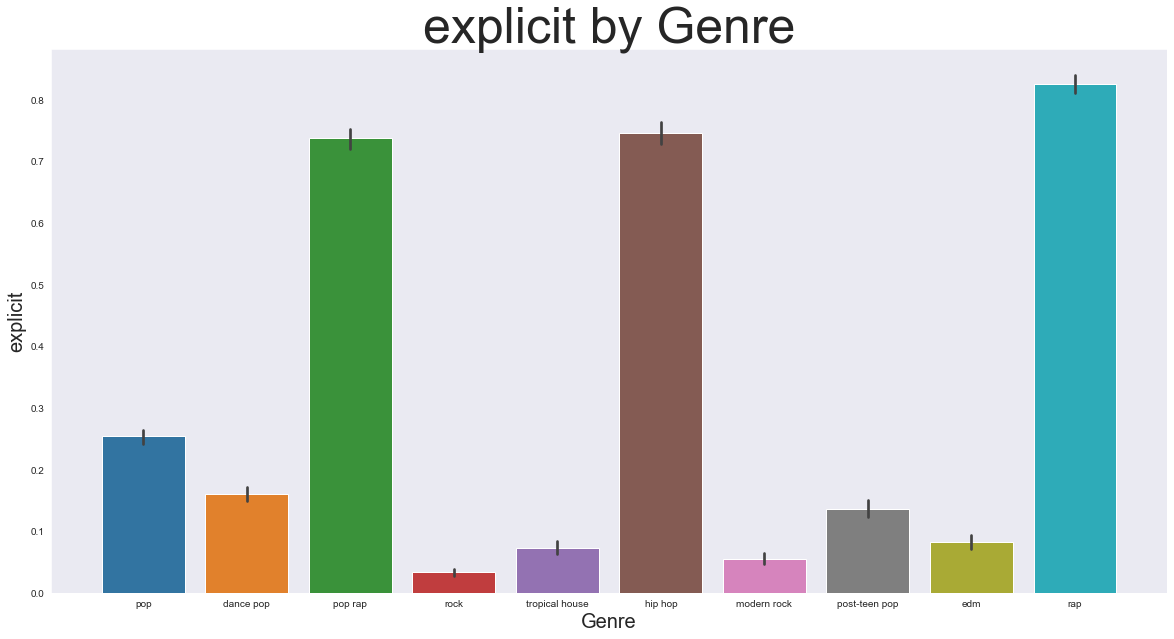

In [55]:
_ = plt.figure(figsize=(20,10))

_ = sns.barplot(final_formatted_df.genre, final_formatted_df.explicit)
_.axes.set_title("explicit by Genre",fontsize=50)
_.set_xlabel("Genre",fontsize=20)
_.set_ylabel("explicit",fontsize=20)

_ = plt.plot()

'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature',

In [56]:
genre_count = final_formatted_df.genre.value_counts().nlargest(10)

In [57]:
type(genre_count)

pandas.core.series.Series

In [58]:
genre_count.keys()

Index(['pop', 'dance pop', 'rock', 'pop rap', 'rap', 'modern rock', 'hip hop',
       'tropical house', 'post-teen pop', 'edm'],
      dtype='object')

In [59]:
genre_count.values

array([5505, 4331, 3175, 3030, 2572, 2538, 2456, 2361, 2356, 2155],
      dtype=int64)

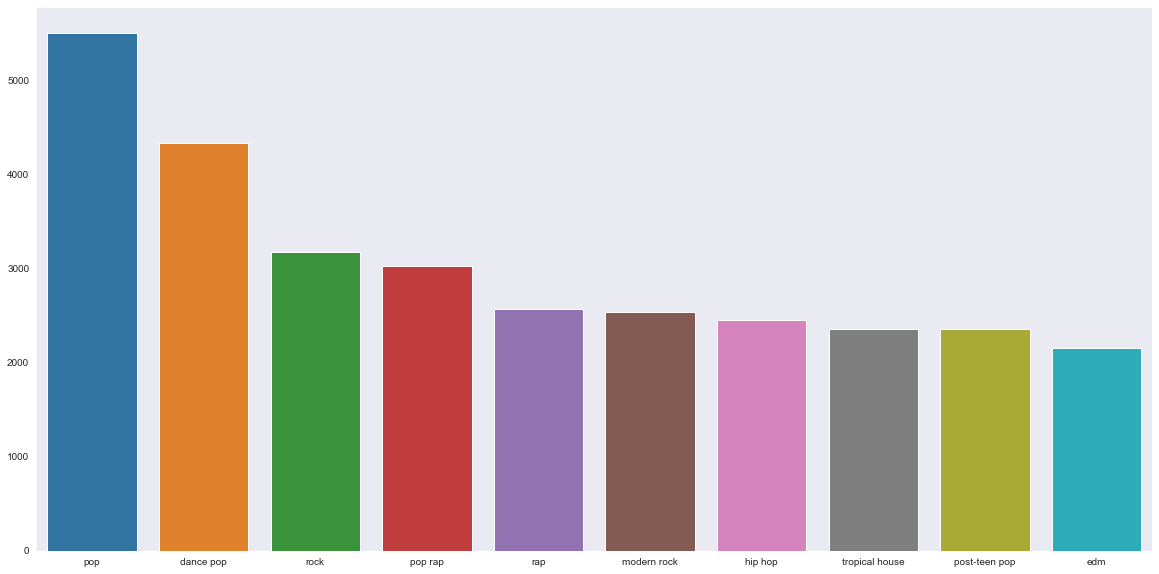

In [60]:
_ = plt.figure(figsize=(20,10))
_ = sns.barplot(genre_count.keys(), genre_count.values)

In [61]:
final_formatted_df.head()

,name,explicit,popularity,track_id,Artist,api_url,genres,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,value
48,IV. Sweatpants,True,69.0,00GOPLxW4PGQuUYdPJh8K1,Childish Gambino,https://open.spotify.com/artist/73sIBHcqh3Z3Ny...,"[atl hip hop, hip hop, pop, pop rap, rap]",0.710,0.470,1,...,0.1420,0.1540,0.00000,0.6430,0.581,80.027,180675,4,pop,1
49,This Is America,True,75.0,0b9oOr2ZgvyQu88wzixux9,Childish Gambino,https://open.spotify.com/artist/73sIBHcqh3Z3Ny...,"[atl hip hop, hip hop, pop, pop rap, rap]",0.854,0.463,5,...,0.1370,0.1170,0.00000,0.3540,0.549,120.024,225773,4,pop,1
50,Redbone,True,78.0,0wXuerDYiBnERgIpbb3JBR,Childish Gambino,https://open.spotify.com/artist/73sIBHcqh3Z3Ny...,"[atl hip hop, hip hop, pop, pop rap, rap]",0.743,0.347,1,...,0.1210,0.1670,0.00951,0.1030,0.572,160.143,326933,4,pop,1
51,3005,True,72.0,2ZltjIqztEpZtafc8w0I9t,Childish Gambino,https://open.spotify.com/artist/73sIBHcqh3Z3Ny...,"[atl hip hop, hip hop, pop, pop rap, rap]",0.472,0.448,6,...,0.3260,0.1130,0.00000,0.0914,0.636,166.077,234215,4,pop,1
52,Me and Your Mama,False,63.0,31tf1qEai5o5f4r66Kd0pU,Childish Gambino,https://open.spotify.com/artist/73sIBHcqh3Z3Ny...,"[atl hip hop, hip hop, pop, pop rap, rap]",0.534,0.433,5,...,0.0357,0.0116,0.04520,0.0667,0.235,117.834,379227,3,pop,1


In [62]:
formated_df.head()

,name,explicit,popularity,track_id,Artist,api_url,genres,danceability,energy,key,...,dance pop,pop rap,rock,tropical house,hip hop,modern rock,post-teen pop,edm,rap,target_genre
30,Worryin' Bout Me,True,49.0,002r1ZwqA9IL2pWtJMOs9f,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.668,0.778,10,...,0,1,0,0,1,0,0,0,1,2
31,Close,True,52.0,11UsaZi96OOQ5nbWLht4UP,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.540,0.522,5,...,0,1,0,0,1,0,0,0,1,2
32,Time Today,False,52.0,1ENwTLdSFBmbIfmiK6o6Ue,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.524,0.536,0,...,0,1,0,0,1,0,0,0,1,2
33,Roses,True,54.0,3SwhPTNNU5hpF33bbCsji6,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.655,0.597,0,...,0,1,0,0,1,0,0,0,1,2
34,Turnin' Me Up,False,65.0,5MjAFPcmrR1DYCgZrXCN4d,BJ The Chicago Kid,https://open.spotify.com/artist/07d5etnpjriczF...,"[alternative r&b, chicago rap, deep pop r&b, h...",0.734,0.776,2,...,0,1,0,0,1,0,0,0,1,2


In [63]:
formated_df = formated_df.rename(columns={'post-teen pop': 'post_teen_pop'})

In [64]:
formated_df.columns

Index(['name', 'explicit', 'popularity', 'track_id', 'Artist', 'api_url',
       'genres', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'pop', 'dance pop',
       'pop rap', 'rock', 'tropical house', 'hip hop', 'modern rock',
       'post_teen_pop', 'edm', 'rap', 'target_genre'],
      dtype='object')

In [65]:
formated_df = formated_df.rename(columns={"dance pop": "dance_pop", "pop rap": "pop_rap", "tropical house": "tropical_house", "hip hop": "hip_hop", "modern rock":"modern_rock"})

In [66]:
X = formated_df[['pop', 'dance_pop','pop_rap', 'rock', 'tropical_house', 'hip_hop', 'modern_rock','post_teen_pop', 'edm', 'rap']]

In [67]:
from statsmodels.formula.api import ols

In [68]:
fit = ols('danceability ~ C(explicit) + pop + dance_pop + pop_rap + rock + tropical_house + hip_hop + modern_rock + post_teen_pop + edm + rap', data=formated_df).fit()

In [69]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     399.8
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:06:00   Log-Likelihood:                 9800.6
No. Observations:               16242   AIC:                        -1.958e+04
Df Residuals:                   16230   BIC:                        -1.948e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6265      0.003    242.308      0.000       0.621       0.632
C(explicit)[T.True]     0.0362      0.003     10.710      0.000       0.030       0.043
pop                    -0.0043      0.003     -1.609      0.108      -0.010       0.001
dance_pop               0.0137      0.003      4.720      0.000       0.008       0.019
pop_rap                 0.0200      0.004      5.053      0.000       0.012       0.028
rock                   -0.0946      0.003    -29.258      0.000      -0.101      -0.088
tropical_house          0.0397      0.003     11.819      0.000       0.033       0.046
hip_hop                 0.0040      0.005      0.839      0.401      -0.005       0.013
modern_rock            -0.0606      0.003    -18.618      0.000      -0.067      -0.054
post_teen_pop          -0.0124      0.003     -3.549      0.000      -0.019      -0.006
edm                    -0.0275      0.004     -7.684      0.000      -0.035      -0.020
rap                     0.0480      0.006      8.680      0.000       0.037       0.059
==============================================================================
Omnibus:                      341.876   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.413
Skew:                          -0.366   Prob(JB):                     1.22e-79
Kurtosis:                       3.050   Cond. No.                         7.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
import statsmodels.api as sm

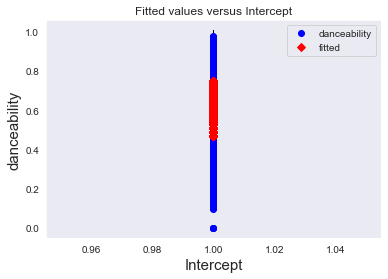

In [71]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(fit, 0, ax=ax)
plt.show()

In [72]:
dependent_variables = ['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

In [ ]:
%%capture
#gather features
features = "+".join(df.columns - ["annual_inc"])

# get y and X dataframes based on this regression:
y, X = dmatrices('annual_inc ~' + features, df, return_type='dataframe')

In [77]:
pvalue_dict = {}
def create_ols(variable):
    fit = ols(variable + '~ C(explicit) + pop + dance_pop + pop_rap + rock + tropical_house + hip_hop + modern_rock + post_teen_pop + edm', data=formated_df).fit()
    print(fit.summary())
    pvalue_dict.update({variable:list(fit.pvalues)})

In [78]:
for values in dependent_variables:
    create_ols(values)

                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     430.2
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:49:09   Log-Likelihood:                 9763.0
No. Observations:               16242   AIC:                        -1.950e+04
Df Residuals:                   16231   BIC:                        -1.942e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6281    

                            OLS Regression Results                            
Dep. Variable:           acousticness   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     112.0
Date:                Thu, 01 Aug 2019   Prob (F-statistic):          1.83e-226
Time:                        17:49:10   Log-Likelihood:                 1385.5
No. Observations:               16242   AIC:                            -2749.
Df Residuals:                   16231   BIC:                            -2664.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2349    

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     27.86
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           1.56e-53
Time:                        17:49:11   Log-Likelihood:                -76756.
No. Observations:               16242   AIC:                         1.535e+05
Df Residuals:                   16231   BIC:                         1.536e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

ModuleNotFoundError: No module named 'skmultilearn'